In [2]:
import matplotlib.pyplot as plt
import matplot2tikz
import pandas as pd
import os

In [5]:
baseline = pd.read_csv("../log/baseline_20251013.csv", names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])

In [7]:
baseline_dropout = pd.read_csv("../log/baseline_dropout_20251013.csv", names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])
baseline_dropout_2 =  pd.read_csv("../log/baseline_dropout_20251014.csv", names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])
baseline_dropout = pd.concat((baseline_dropout, baseline_dropout_2))

In [10]:
baseline_dropout.head()

,dataset,test_fitness,seed,epoch,timing
0,concrete_strength,19.078798,7,1000,1286.842850
1,concrete_strength,15.872239,6,1000,1291.670232
2,concrete_strength,23.152205,14,1000,1288.416214
3,concrete_strength,18.174944,15,1000,1293.809257
4,concrete_strength,21.913498,22,1000,1288.935829


In [26]:
tneat = pd.read_csv("../log/tensor neat.csv")
tneat2 = pd.read_csv("../log/ld50_runs_26_.csv")
tneat3 = pd.read_csv("../log/bioav_runs.csv")
tneat3 = tneat3[tneat3['Name'].apply(lambda x: int(x.split('-')[-1]) < 30)]
tneat4 = pd.read_csv("../log/airfoil_runs.csv")
tneat = pd.concat((tneat, tneat2, tneat3, tneat4))

In [27]:
tneat.head()

,Duration,Run ID,Name,compatibility_threshold,dataset,generations,max_conns,max_nodes,pop_size,seed,...,final_model_test_rmse,final_model_train_rmse,hidden_layers,iteration_time,test_rmse,train_rmse,Source Type,Source Name,User,Status
0,9.4min,96224eb768a7420fa5b1348ed6c3bd7e,tensorneat:concrete_strength:seed-29,2.5,concrete_strength,1000,640,192,100,29,...,6.890226,6.786598,15.0,0.515070,7.059199,6.786598,NaN,NaN,NaN,NaN
1,9.3min,1b0d105040254539a0db1a6cdfbf3a19,tensorneat:concrete_strength:seed-28,2.5,concrete_strength,1000,640,192,100,28,...,6.870596,6.763392,14.0,0.512412,7.119328,6.763392,NaN,NaN,NaN,NaN
2,9.0min,cee8ab1b7fe447e7bb8f15ac6eb17b94,tensorneat:concrete_strength:seed-27,2.5,concrete_strength,1000,640,192,100,27,...,6.710450,7.032411,13.0,0.510767,6.942312,7.032411,NaN,NaN,NaN,NaN
3,9.1min,721b85302879440a85fb5e773e226839,tensorneat:concrete_strength:seed-26,2.5,concrete_strength,1000,640,192,100,26,...,6.448058,6.816668,12.0,0.502488,6.504291,6.816668,NaN,NaN,NaN,NaN
4,8.9min,9f7ee07fefca48b493bccb7e21af57d5,tensorneat:concrete_strength:seed-25,2.5,concrete_strength,1000,640,192,100,25,...,6.987205,6.914213,11.0,0.495144,6.987205,6.914213,NaN,NaN,NaN,NaN


In [11]:
data = pd.read_csv('../log/20250916.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])

In [12]:
data2 = pd.read_csv('../log/20250925.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])

In [13]:
data = pd.concat((data, data2))

In [14]:
data

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing
0,bioav,22.310970,40.867321,3385,1,4,0,0,17.983564
1,bioav,22.310970,40.867321,3385,1,4,0,1,0.037210
2,bioav,22.310970,40.867321,3385,1,4,0,2,0.043063
3,bioav,22.287769,40.857639,3659,2,4,0,3,0.047241
4,bioav,22.287769,40.857639,3659,2,4,0,4,0.050988
...,...,...,...,...,...,...,...,...,...
154072,airfoil,4.572006,4.713674,12455,361,4,16,1996,0.083596
154073,airfoil,4.572006,4.713674,12455,361,4,16,1997,0.083445
154074,airfoil,4.572006,4.713674,12455,361,4,16,1998,0.095142
154075,airfoil,4.571897,4.711577,12625,366,4,16,1999,0.081373


In [15]:
data.drop_duplicates(subset = ['dataset', 'generation', 'seed'], keep = 'last', inplace = True)

In [16]:
datas = data.dataset.unique()

In [17]:
datas

array(['bioav', 'ld50', 'concrete_strength', 'airfoil'], dtype=object)

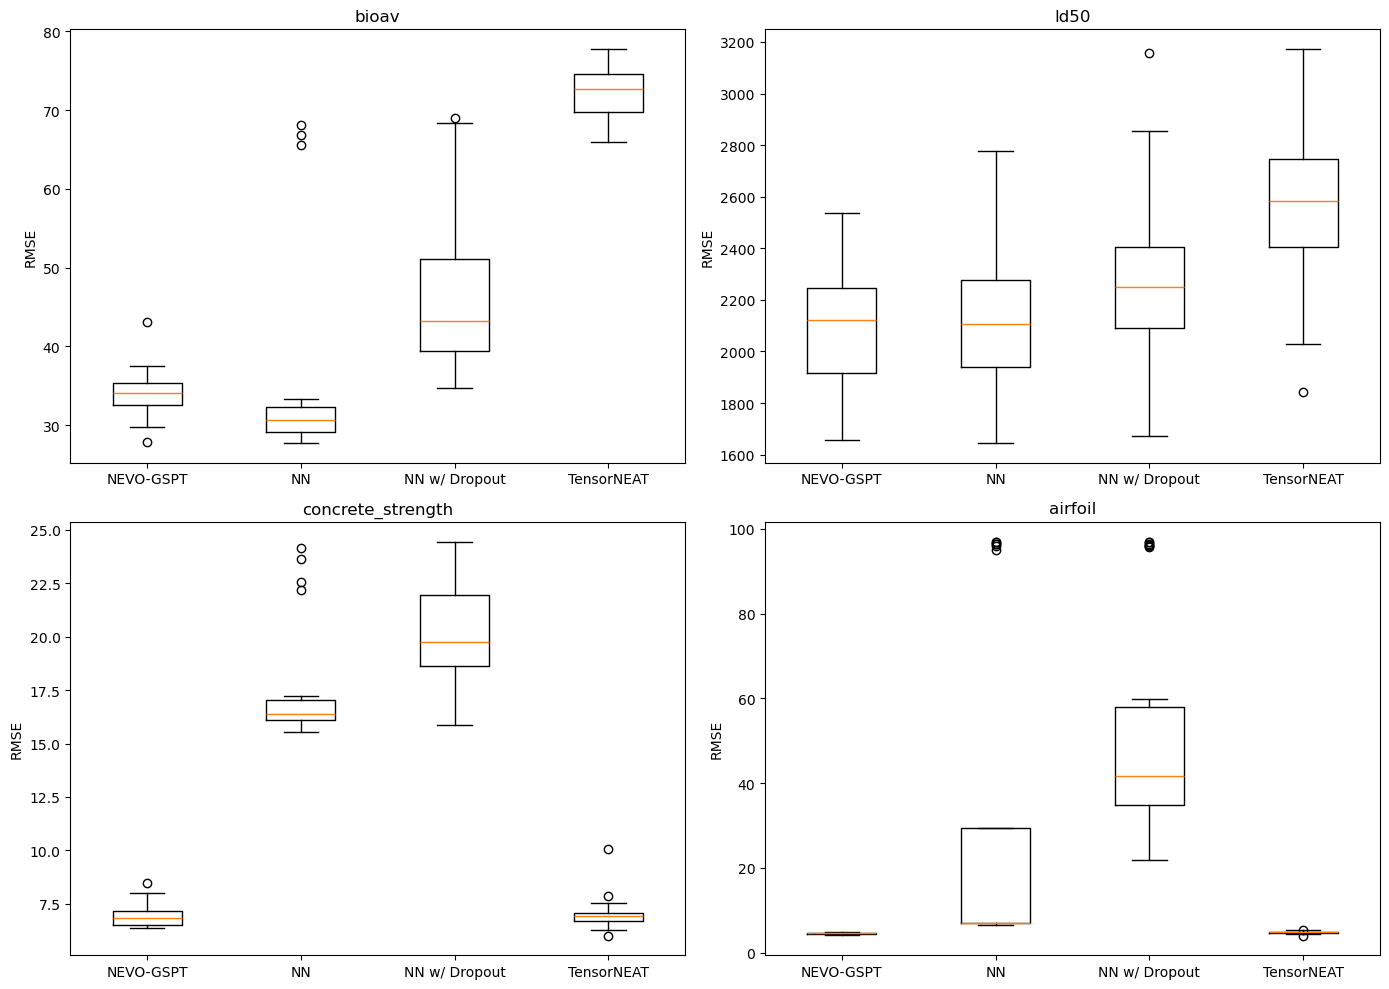

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten to access axes with a single index

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis
    
    # Filter data for the current dataset and generation
    filtered_data = data[(data['dataset'] == dataset) & 
                        (data['generation'] == 2000)]
    
    # Extract the specific column as 1D array
    nevo_values = filtered_data['test_fitness'].values

    baseline_values = baseline[baseline['dataset'] == dataset]['test_fitness'].values

    baseline_dropout_values = baseline_dropout[baseline_dropout['dataset'] == dataset]['test_fitness'].values

    # Extract TensorNEAT values (fix the boolean indexing)
    tneat_values = tneat[tneat['dataset'] == dataset]['final_model_test_rmse'].values if len(tneat[tneat['dataset'] == dataset]) > 0 else None
    
    # Prepare data for boxplot (each element should be a 1D array)
    if tneat_values is not None and len(tneat_values) > 0:
        grouped = [nevo_values, baseline_values, baseline_dropout_values, tneat_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout', 'TensorNEAT']
    else:
        grouped = [nevo_values, baseline_values, baseline_dropout_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout']
    
    ax.boxplot(grouped, labels=labels)
    ax.set_title(dataset)
    ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

% This file was created with matplot2tikz v0.3.2.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{darkorange25512714}{RGB}{255,127,14}

\begin{groupplot}[group style={group size=2 by 2}]
\nextgroupplot[
tick align=outside,
tick pos=left,
title={bioav},
x grid style={darkgray176},
xmin=0.5, xmax=4.5,
xtick style={color=black},
xtick={1,2,3,4},
xticklabels={NEVO-GSPT,NN,NN w/ Dropout,TensorNEAT},
y grid style={darkgray176},
ylabel={RMSE},
ymin=25.2187547682163, ymax=80.2709341081802,
ytick style={color=black}
]
\addplot [black]
table {%
0.775 32.5739231109619
1.225 32.5739231109619
1.225 35.3645458221436
0.775 35.3645458221436
0.775 32.5739231109619
};
\addplot [black]
table {%
1 32.5739231109619
1 29.7070045471191
};
\addplot [black]
table {%
1 35.3645458221436
1 37.519474029541
};
\addplot [black]
table {%
0.8875 29.7070045471191
1.1125 29.7070045471191
};
\addplot [black]
table {%
0.8875 37.519474029541
1.1125 37.519474029541
};
\addplot [black, mark=o, m

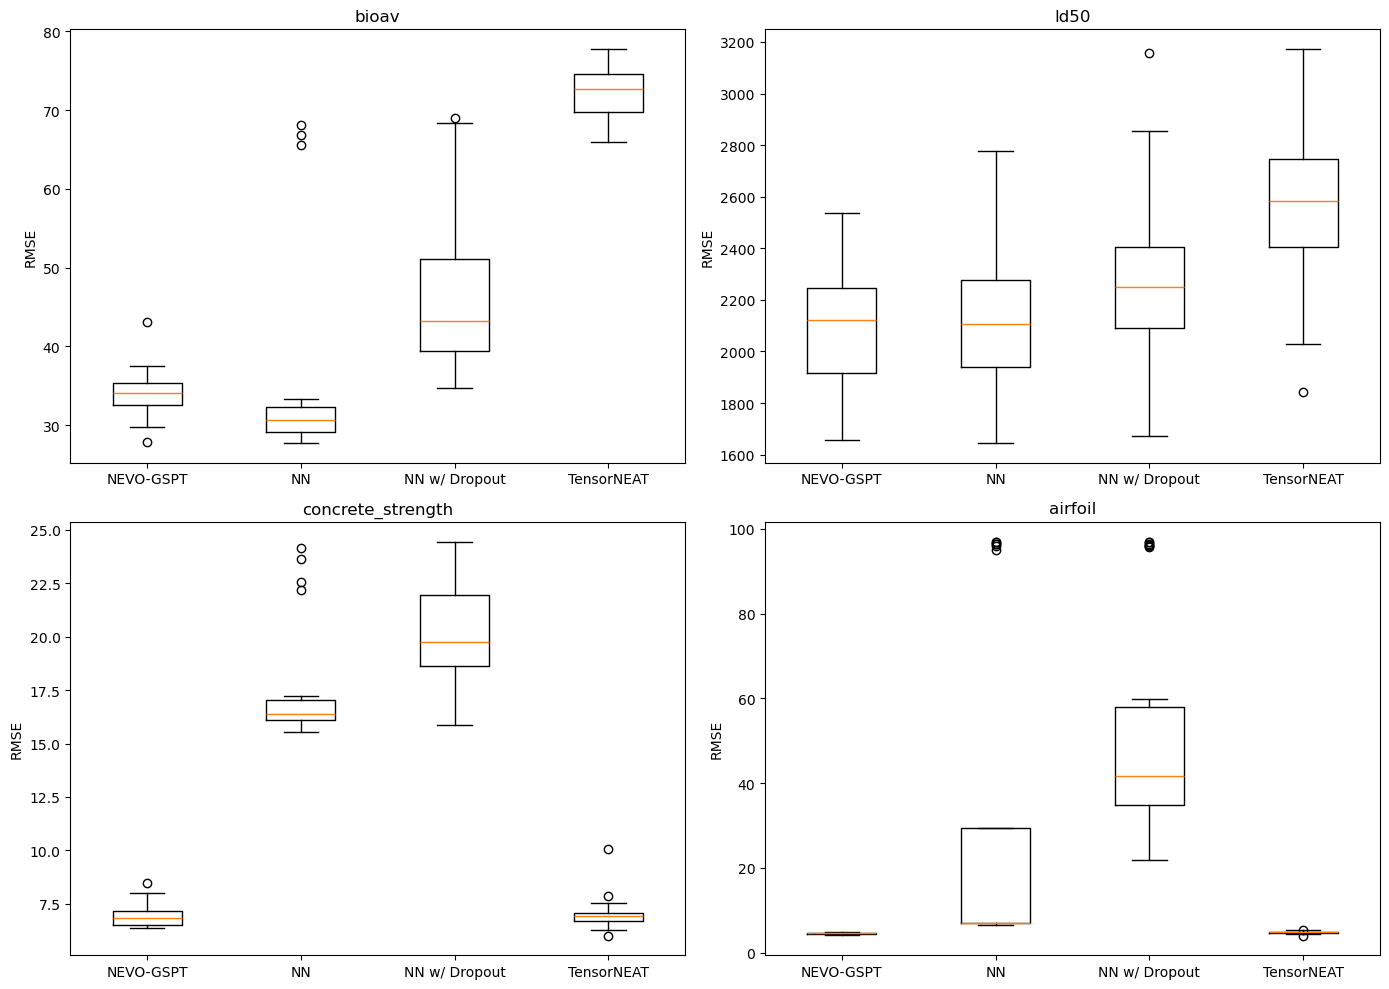

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten to access axes with a single index

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis
    
    # Filter data for the current dataset and generation
    filtered_data = data[(data['dataset'] == dataset) & 
                        (data['generation'] == 2000)]
    
    # Extract the specific column as 1D array
    nevo_values = filtered_data['test_fitness'].values

    baseline_values = baseline[baseline['dataset'] == dataset]['test_fitness'].values

    baseline_dropout_values = baseline_dropout[baseline_dropout['dataset'] == dataset]['test_fitness'].values

    # Extract TensorNEAT values (fix the boolean indexing)
    tneat_values = tneat[tneat['dataset'] == dataset]['final_model_test_rmse'].values if len(tneat[tneat['dataset'] == dataset]) > 0 else None
    
    # Prepare data for boxplot (each element should be a 1D array)
    if tneat_values is not None and len(tneat_values) > 0:
        grouped = [nevo_values, baseline_values, baseline_dropout_values, tneat_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout', 'TensorNEAT']
    else:
        grouped = [nevo_values, baseline_values, baseline_dropout_values]
        labels = ['NEVO-GSPT', 'NN', 'NN w/ Dropout']
    
    ax.boxplot(grouped, labels=labels)
    ax.set_title(dataset)
    ax.set_ylabel('RMSE')

plt.tight_layout()
# plt.show()
print(matplot2tikz.get_tikz_code())